In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import matplotlib.pyplot as plt


np.random.seed(0)

# Dataset and Data Preprocessing

## Handling Missing Values

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df = df.drop(columns=['Id'])
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Many rows containing NaN values actually represent categorical options such as "No alley access". Thus, for better analysis these values are changed to No

In [ ]:
# Alley
df["Alley"].fillna("No", inplace = True)

# Basement
df['BsmtQual'].fillna('No', inplace=True)
df['BsmtCond'].fillna('No', inplace=True)
df['BsmtExposure'].fillna('No', inplace=True)
df['BsmtFinType1'].fillna('No', inplace=True)
df['BsmtFinType2'].fillna('No', inplace=True)

# Fireplace
df['FireplaceQu'].fillna('No', inplace=True)

# Garage
df['GarageType'].fillna('No', inplace=True)
df['GarageFinish'].fillna('No', inplace=True)
df['GarageQual'].fillna('No', inplace=True)
df['GarageCond'].fillna('No', inplace=True)

# Pool
df['PoolQC'].fillna('No', inplace=True)

# Fence
df['Fence'].fillna('No', inplace=True)

# Misc
df['MiscFeature'].fillna('No', inplace=True)


In [ ]:
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

df['MasVnrType'].fillna('None', inplace=True)
df['MasVnrArea'].fillna(0, inplace=True)

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

NaN values in GarageYrBlt can represent two things:


1.   NaN value are there because there is no garage (No Garage in the GarageType column)
2.   There is no info on the year built



In [ ]:
no_garage_correlation = df[(df['GarageYrBlt'].isna()) & (df['GarageType'] == 'No')]
print(f"Number of NaN GarageYrBlt where GarageType is 'No': {len(no_garage_correlation)}")

total_nan_garage_year = df['GarageYrBlt'].isna().sum()
print(f"Total number of NaN values in GarageYrBlt: {total_nan_garage_year}")

Number of NaN GarageYrBlt where GarageType is 'No': 81
Total number of NaN values in GarageYrBlt: 81


This is a 1-1 correlation, therefore we simply change NaN values to 0

In [ ]:
df['GarageYrBlt'].fillna(0, inplace=True)

In [ ]:
df.isna().sum().sum()

0

Now there are no NaN values

## Encoding Categorical Data

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

df['MSSubClass'] = df['MSSubClass'].astype(str)

categorical_columns = ['MSSubClass',
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
    'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
    'SaleCondition'
]
numerical_columns_original = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

encoded_array = encoder.fit_transform(df[categorical_columns])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categorical_columns))

df = df.drop(columns=categorical_columns)
df = pd.concat([df, encoded_df], axis=1)


In [ ]:
df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Outliers

Most relevant numerical columns with potential outliers

In [ ]:
numerical_columns = ['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'WoodDeckSF']

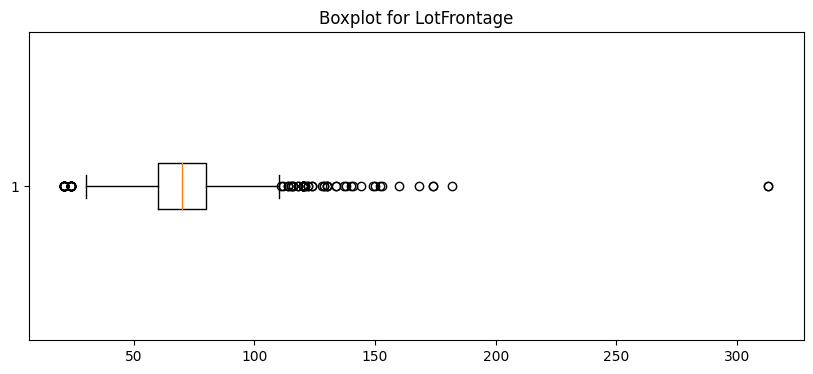

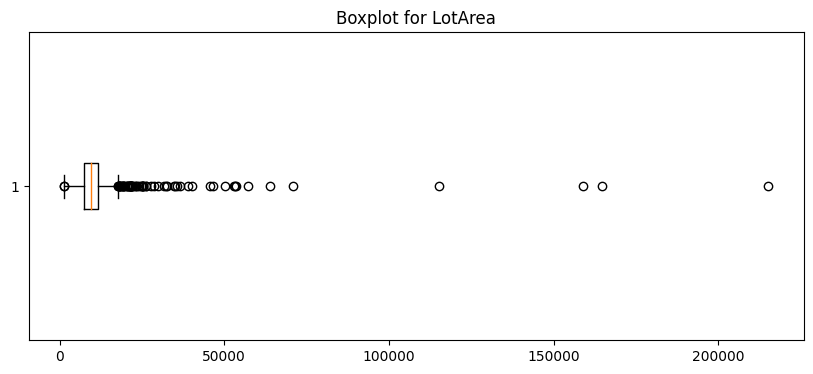

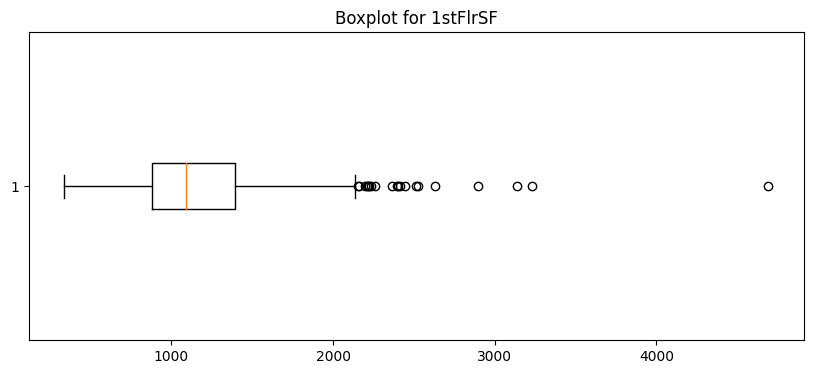

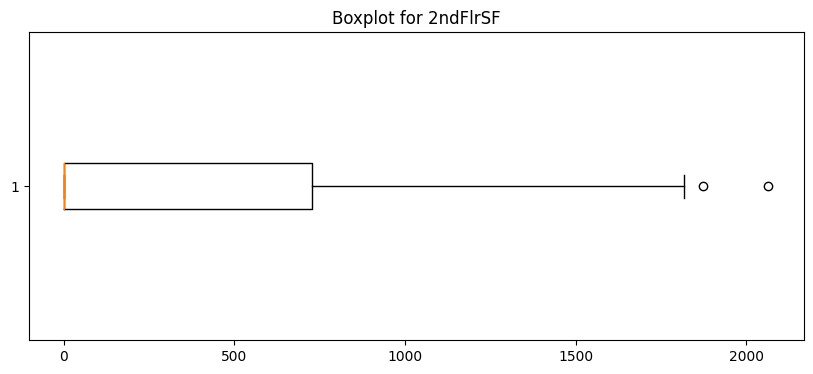

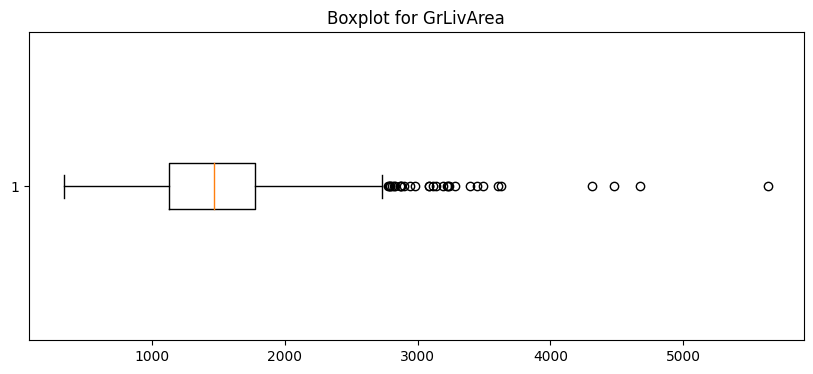

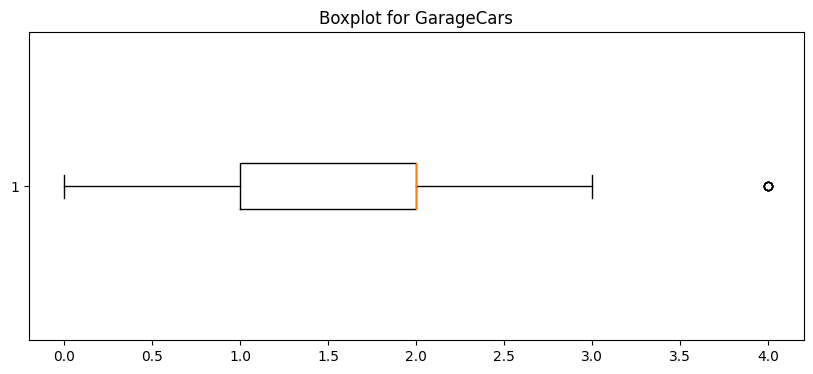

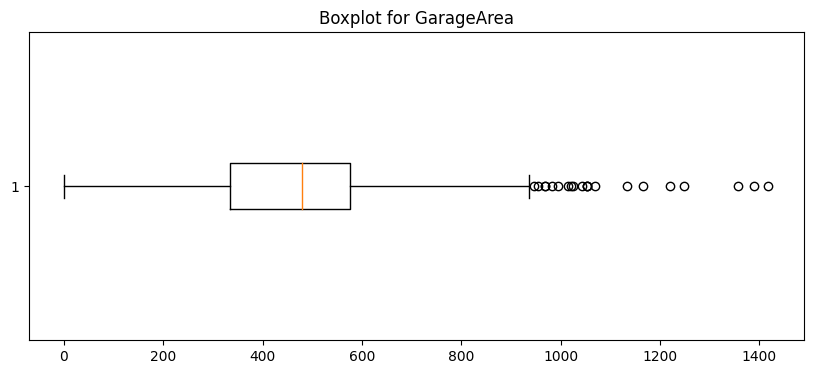

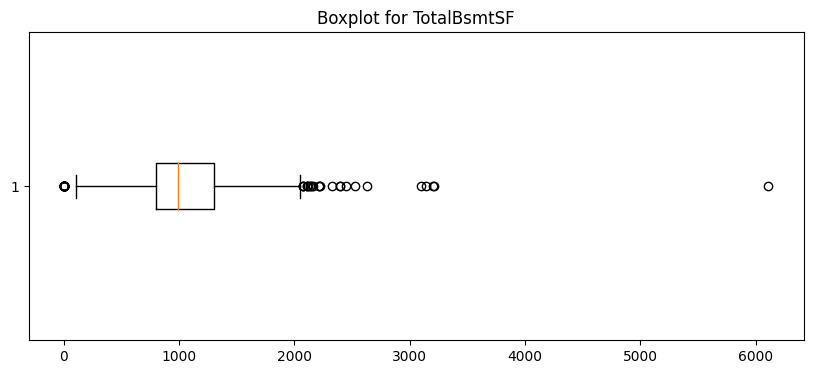

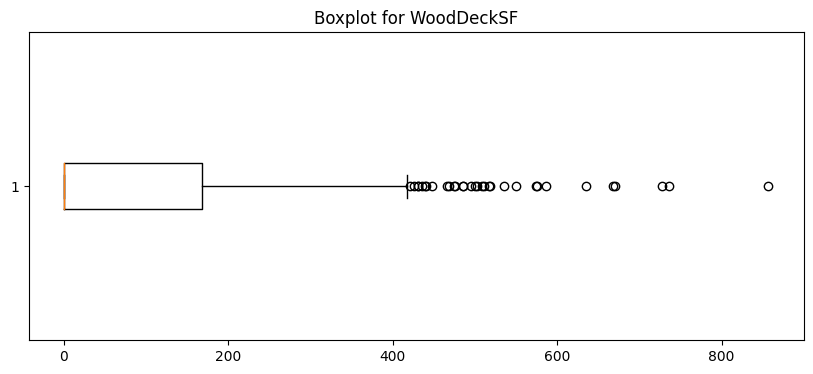

In [ ]:
for col in numerical_columns:
    plt.figure(figsize=(10, 4))
    plt.title(f'Boxplot for {col}')
    plt.boxplot(df[col].dropna(), vert=False)
    plt.show()

In [ ]:
df.shape

(1460, 272)

In [ ]:
for column in numerical_columns:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
df.shape

(1178, 272)

## Feature Scaling

In [ ]:
numerical_columns_original

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [ ]:
# Normalization

for column in numerical_columns_original:
    min_val = df[column].min()
    max_val = df[column].max()

    df[column] = (df[column] - min_val) / (max_val - min_val)


In [ ]:
df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.4375,0.426286,0.666667,0.500,0.949275,0.883333,0.12250,0.436072,0.0,0.078658,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.6250,0.505585,0.555556,0.875,0.753623,0.433333,0.00000,0.604077,0.0,0.148925,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.4750,0.619363,0.666667,0.500,0.934783,0.866667,0.10125,0.300185,0.0,0.227583,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.3750,0.502138,0.666667,0.500,0.311594,0.333333,0.00000,0.133416,0.0,0.283167,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.6750,0.826920,0.777778,0.500,0.927536,0.833333,0.21875,0.404571,0.0,0.256948,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
